In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/rohanmittal149/Solar-Radiation-Prediction/Major/SolarDelhi.csv', index_col = 0)

In [35]:
data.head()

,YEAR,MO,DY,PRECTOT,QV2M,PS,TS,KT,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN,Date
0,1986,1,1,0.0,0.003886,99.11,11.85,0.68,3.97,6.50,1-1-1986
1,1986,1,1,0.0,0.003804,99.05,11.48,0.68,3.97,6.50,1-1-1986
2,1986,1,2,0.0,0.003462,99.13,11.86,0.76,4.42,6.36,2-1-1986
3,1986,1,2,0.0,0.003457,99.06,12.04,0.76,4.42,6.36,2-1-1986
4,1986,1,3,0.0,0.002913,99.31,10.09,0.73,4.29,6.50,3-1-1986


In [0]:
data.drop(['YEAR','DY','MO'], axis = 1, inplace =True)

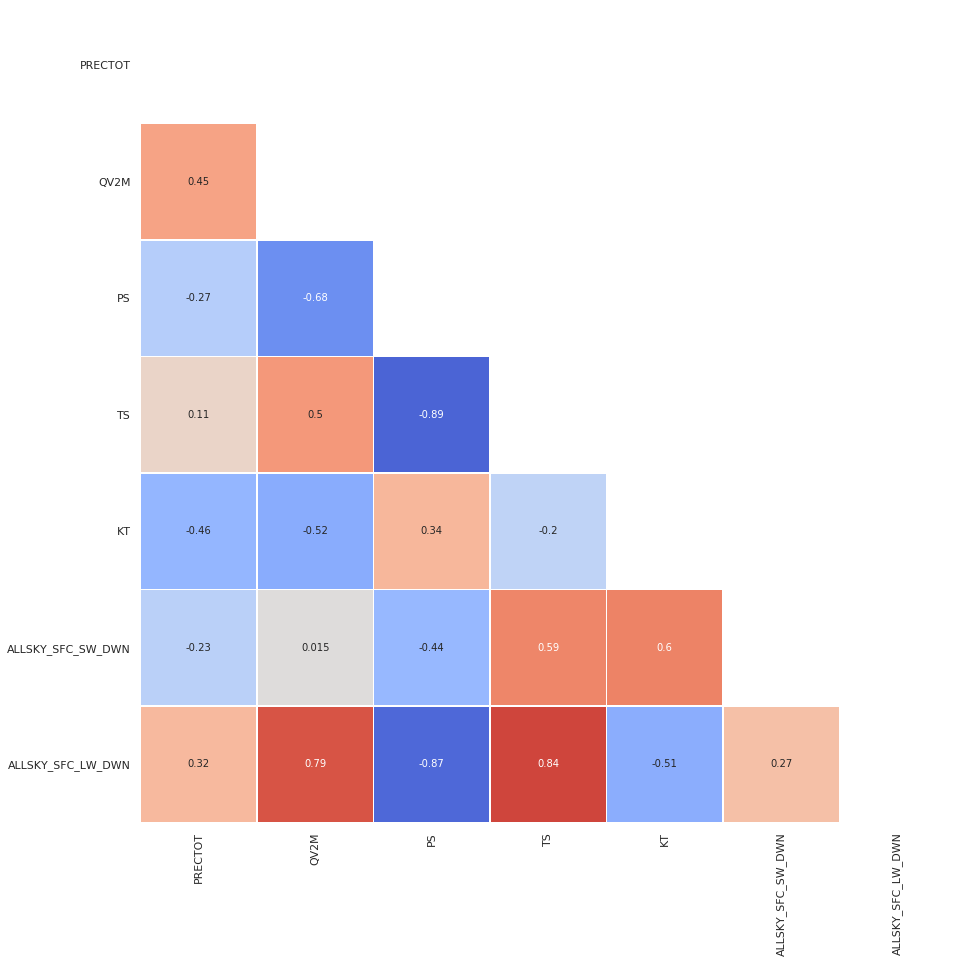

In [37]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#data['WeekOfYear'] = data.index.Date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(data)

In [0]:
input_feature= data.iloc[:, :-2].values
input_data = input_feature

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,:] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 50

test_size=int(.3 * len(data))
X=[]
y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [41]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 6)
X_test = X_test.reshape(X_test.shape[0],lookback, 6)
print(X.shape)
print(X_test.shape)

(24521, 50, 6)
(7421, 50, 6)


In [0]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [43]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],6)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50, 30)            4440      
_________________________________________________________________
lstm_8 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_9 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 19,111
Trainable params: 19,111
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X, y, epochs=20, batch_size=512)

Epoch 1/20
24521/24521 [==============================] - 16s 670us/step - loss: 0.0445
Epoch 2/20
24521/24521 [==============================] - 14s 579us/step - loss: 0.0068
Epoch 3/20
24521/24521 [==============================] - 14s 582us/step - loss: 0.0062
Epoch 4/20
24521/24521 [==============================] - 14s 579us/step - loss: 0.0057
Epoch 5/20
24521/24521 [==============================] - 14s 579us/step - loss: 0.0054
Epoch 6/20
24521/24521 [==============================] - 14s 580us/step - loss: 0.0050
Epoch 7/20
24521/24521 [==============================] - 14s 582us/step - loss: 0.0046
Epoch 8/20
24521/24521 [==============================] - 14s 583us/step - loss: 0.0042
Epoch 9/20
24521/24521 [==============================] - 14s 580us/step - loss: 0.0037
Epoch 10/20
24521/24521 [==============================] - 14s 580us/step - loss: 0.0033
Epoch 11/20
24521/24521 [==============================] - 15s 594us/step - loss: 0.0027
Epoch 12/20
24521/24521 [=====

In [0]:
predicted_value= model.predict(X_test)

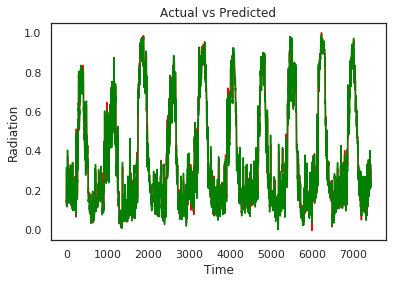

In [49]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.show()